<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem10/news_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import os

In [2]:
from io import BytesIO
import requests
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

def load_imdb_dataset(extract_path="", overwrite=False):
    #check if existed already
    if os.path.isfile(os.path.join(extract_path, "aclImdb", "README")) and not overwrite:
        print("IMDB dataset is already in place.")
        return
    
    print("Downloading the dataset from:  ", url)
    response = requests.get(url)
    
    tar = tarfile.open(mode= "r:gz", fileobj = BytesIO(response.content))
    
    data = tar.extractall(extract_path)
    
load_imdb_dataset()

IMDB dataset is already in place.


In [3]:
#change if you have it in alternative location
PATH_TO_IMDB = "aclImdb"

reviews_train = load_files(os.path.join(PATH_TO_IMDB, "train"),
                           categories=['pos', 'neg'])
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(os.path.join(PATH_TO_IMDB, "test"),
                          categories=['pos', 'neg'])
text_test, y_test = reviews_test.data, reviews_test.target

In [4]:
print ( "Количество документов в обучающих данных: % d "  %  len ( text_train )) 
print ( np . bincount ( y_train )) 
print ( "Количество документов в тестовых данных: % d "  %  len ( text_test )) 
print ( np . bincount ( y_test ))

Количество документов в обучающих данных:  25000 
[12500 12500]
Количество документов в тестовых данных:  25000 
[12500 12500]


In [5]:
print(text_train[1])

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [6]:
y_train[1] # bad review

0

In [7]:
print(text_train[4])

b'I\'ve just had the evidence that confirmed my suspicions. A bunch of kids, 14 to 22 put on the DVD of "Titanic" on a fantastic state of the art mega screen home entertainment type deal. Only two of them had actually seen it before. But they all had seen the moment of Kate, Leo and Celine Dion so many times that most of them felt they had seen the whole movie. Shortly after the epic started, they started to get restless, some of them left asking the others -- "call us when the iceberg appears" Over an hour and a half into the movie, only the two girls who had seen the movie before, were still there. They started shouting: iceberg, iceberg. A stampede followed, they all came back to see the sinking of the Titanic. They sat open mouthed, emitting Ohs and far outs. So, just like I thought when the movie first burst into the scene. What is this? One and a half hours waiting for the bloody thing to sink but what about the rest of the of it. Dr. Zivagho, for instance, had a similar running 

In [8]:
y_train[2] # good review

1

In [9]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

74849

In [10]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [11]:
print(text_train[193])

b"Okay, if you've seen The Ring, you've basically seen The Grudge. It's trying to be scary by just having freaky camera work and loud sounds, but it fails miserably. The plot, if you can call it that, is weak and rather full of holes, for instance, how would the care center have known that Yoko didn't show up for work when the people who lived in the house were not there? And it's not really clear what Bill Pullman's character had to do with anything. He just kind of came out of nowhere to advance the plot. It didn't make a lot of sense what happened to the original family. Who was hanging in the room, the little boy or the dad? And was Yoko alive or dead when the care center guy found her? There were too many unanswered questions and I was too bored to think about it more."


In [12]:
X_train[193].nonzero()[1]

array([ 1277,  1922,  2656,  3258,  3718,  6144,  6334,  7330,  8491,
        8701,  9881,  9962, 10204, 10270, 10279, 10357, 10637, 11332,
       11615, 12750, 16258, 16746, 18303, 19326, 23564, 23690, 25450,
       25715, 25944, 26307, 28888, 29233, 29369, 29722, 29774, 30118,
       30131, 30211, 30646, 31312, 31819, 31858, 32517, 33004, 33883,
       34585, 34683, 35787, 36608, 36924, 39044, 39057, 39486, 39506,
       40421, 40829, 43080, 43838, 46050, 46156, 46680, 46803, 47142,
       47274, 47449, 49147, 50428, 52493, 52961, 53602, 53839, 55881,
       56383, 57836, 58613, 58812, 59873, 61841, 66322, 66339, 66432,
       66526, 67125, 67324, 68412, 69057, 70331, 70920, 72196, 72366,
       72601, 72703, 72753, 72904, 73342, 73616, 73714, 74280, 74324],
      dtype=int32)

In [13]:
X_train[193].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([ 1277,  1922,  2656,  3258,  3718,  6144,  6334,  7330,  8491,
         8701,  9881,  9962, 10204, 10270, 10279, 10357, 10637, 11332,
        11615, 12750, 16258, 16746, 18303, 19326, 23564, 23690, 25450,
        25715, 25944, 26307, 28888, 29233, 29369, 29722, 29774, 30118,
        30131, 30211, 30646, 31312, 31819, 31858, 32517, 33004, 33883,
        34585, 34683, 35787, 36608, 36924, 39044, 39057, 39486, 39506,
        40421, 40829, 43080, 43838, 46050, 46156, 46680, 46803, 47142,
        47274, 47449, 49147, 50428, 52493, 52961, 53602, 53839, 55881,
        56383, 57836, 58613, 58812, 59873, 61841, 66322, 66339, 66432,
        6

In [14]:
X_test = cv.transform(text_test)

In [15]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

CPU times: user 55.7 ms, sys: 99.8 ms, total: 155 ms
Wall time: 4.39 s


In [16]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3),

(0.981, 0.864)

In [17]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [18]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();

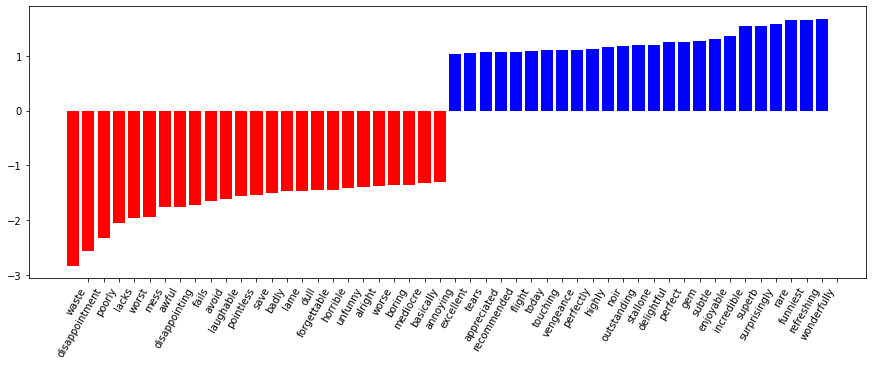

In [19]:
visualize_coefficients(logit, cv.get_feature_names())

In [20]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(),
                                # for some reason n_jobs > 1 won't work 
                                # with GridSearchCV's n_jobs > 1
                                LogisticRegression(solver='lbfgs', 
                                                   n_jobs=1,
                                                   random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8642


In [21]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, 
                          param_grid_logit, 
                          return_train_score=True, 
                          cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

CPU times: user 13 s, sys: 3.47 s, total: 16.4 s
Wall time: 2min 26s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8855599340364303)

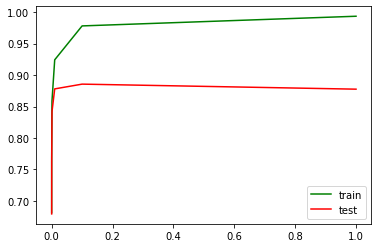

In [23]:
plot_grid_scores(grid_logit, 'logisticregression__C')

In [24]:
grid_logit.score(text_test, y_test)

0.87812

# SVM

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm.fit(X_train, y_train)
# params = {
    # 'C': [0.001, 0.01, 0.1, 1]
# }
# best_svm = GridSearchCV(svm, params, verbose = True)
# best_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn.metrics import accuracy_score as acc, f1_score as f1
preds = svm.predict(X_test)
print(f'Acc = {acc(preds, y_test)}')
print(f'F1 = {f1(preds, y_test)}')

Acc = 0.86204
F1 = 0.8634978430363716


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
preds = rf.predict(X_test)
print(f'Acc = {acc(preds, y_test)}')
print(f'F1 = {f1(preds, y_test)}')

Acc = 0.84488
F1 = 0.8441819350691097


Вывод: как и ожидалось, линейная модель метода опорных веторов показала лучший результат, нежели случайный лес вследствие линейности исходных данных